 Screening Task - 2:

The bit-flip code and the sign-flip code (you can find a description of both ​here​) are two very simple circuits able to detect and fix the bit-flip and the sign-flip errors, respectively.
1) Build the following simple circuit to prepare the Bell state:

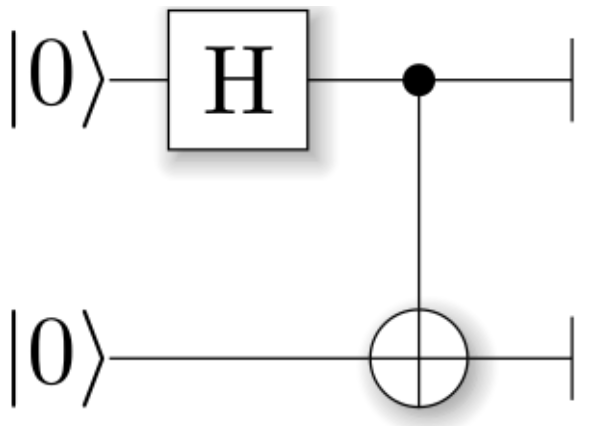

2) Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

3) Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the possible choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

4) Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.
 

In [1]:
import numpy as np
import itertools
import matplotlib
import pylab
import copy
# import pylatexenc

In [2]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, Aer, transpile,execute
from qiskit.visualization import plot_histogram
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Parameter
%matplotlib inline

Q1. We replicate the circuit given in the question to achieve Bell States.

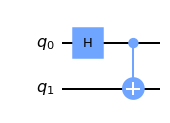

In [22]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

In [5]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")
print(final_state)

<IPython.core.display.Math object>

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Q2. As per the second part of the task we introduce a bit flip error in both the qubits.


In [20]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qce = QuantumCircuit(qr,cr)

qce.h(0)

qce.barrier(qr[:])

# bit-flip error
qce.x(qr[0:2])

qce.barrier(qr[:])

qce.cx(qr[0],qr[1])
qce.draw('mpl')

qce.barrier(qr[:])

Q3. In the third part we are asked to use additional qubits to correct this error induced to the bit flip we introduced in the previous problem.

We use ancilla bits to identify the error in the qubits and measure them onto the syndrome bits.


In [7]:
backend = Aer.get_backend('statevector_simulator')
final_state_E = execute(qce,backend).result().get_statevector()

In [8]:
array_to_latex(final_state_E, pretext="\\text{Statevector} = ")
print(final_state_E)

<IPython.core.display.Math object>

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


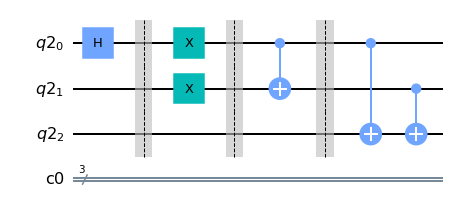

In [9]:
# Ancilla Qubits
qce.cx(qr[0],qr[2])
qce.cx(qr[1],qr[2])

qce.draw('mpl')

In the above circuit we can see that the ancilla qubit will indicate if the data qubits have an error without collapsing the wavefinctions of the encoded data.

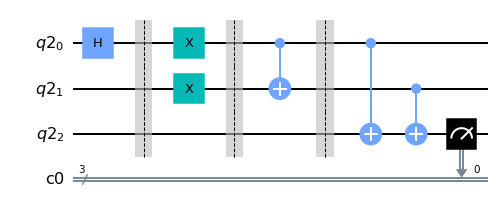

In [10]:
qce.measure(qr[2], cr[0])

qce.draw('mpl')

Now we use the QASM simulator to check if the ancilla qubits are able to detect the errors. 

In [11]:
counts = execute(qce, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:', counts)

Results: {'001': 1024}


After executing the circuit on the QASM simulator we can see that the ancilla qubit is '1' indicating that there's a bit-flip error in the data. Using this method we cn identify and perform error correction on

Q4. Introducing various bit flip errors in the inpiut signals.

In [27]:
qre = QuantumRegister(3)
cre = ClassicalRegister(3)
qce = QuantumCircuit(qr,cr)

qce.h(0)

qce.barrier(qr[:])

# bit-flip error
qce.x(qr[0:1])

qce.barrier(qr[:])

qce.cx(qr[0],qr[1])
qce.draw('mpl')

qce.barrier(qr[:])

In [24]:
backend = Aer.get_backend('statevector_simulator')
final_state_E = execute(qce,backend).result().get_statevector()

In [25]:
array_to_latex(final_state_E, pretext="\\text{Statevector} = ")
print(final_state_E)

<IPython.core.display.Math object>

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


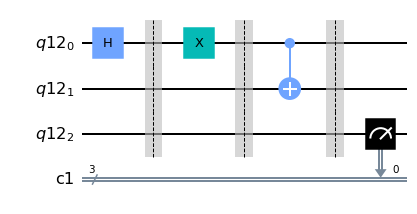

In [28]:
qce.measure(qr[2], cr[0])
qce.draw('mpl')